# Import Library

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import pandas as pd
import time

# Declare NeuralNet class

In [2]:
# NeuralNet
class NN:
    
    # 생성자
    # 필요한 변수 nodes of layer and weights and function.
    def __init__(self,inputnodes, hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih=np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes)) #랜덤하면 너무 점수가 낮음 정규분포로하자!
        self.who=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        # activation function
        self.activation_function = lambda x :scipy.special.expit(x)
        
        pass
    
    
    #
    def train(self,inputs_list,targets_list):
        # forward propagation
        # input과 target을 받아와 numpy array로 변환 
        inputs =np.array(inputs_list,ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T
        
        # calc on hidden_layer
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calc on output_layer
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # error
        target_errors = targets-final_outputs
        
        
        ## backPropagation
        
        # hidden layer error derived from target_error
        hidden_errors=np.matmul(np.transpose(self.who),target_errors)
        
        # update weights between hidden and output layer
        self.who = self.who + self.lr*np.matmul(target_errors*final_outputs*(1-final_outputs),np.transpose(hidden_outputs))
        # update weights between input and hidden layer
        self.wih = self.wih + self.lr*np.matmul(hidden_errors*hidden_outputs*(1-hidden_outputs),np.transpose(inputs))
        pass
    
    

    def query(self,inputs_list) :
        inpus = np.array(inputs_list,ndmin=2).T
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

        
        return final_outputs

# Set HyperParams

In [3]:
input_nodes = 784
hidden_nodes = 150
output_nodes = 10 #0~9 구분가능하게
learningrate = 0.5

# create Neural Net with HyperParams
n = NN(input_nodes,hidden_nodes,output_nodes,learningrate)



# Load dataSet

In [4]:
training_data_file = open("mnist_dataset/mnist_train.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()
test_data_file = open("mnist_dataset/mnist_test.csv")
test_data_list=test_data_file.readlines()
test_data_file.close()

# Stochastic Gradient Descent

sc's performance= 0.9261
32.083028078079224 seconds for 1 epoches
sc's performance= 0.93235
33.838563203811646 seconds for 1 epoches
sc's performance= 0.9372333333333334
35.216979026794434 seconds for 1 epoches
sc's performance= 0.9383
34.858652114868164 seconds for 1 epoches
sc's performance= 0.93952
35.44012093544006 seconds for 1 epoches


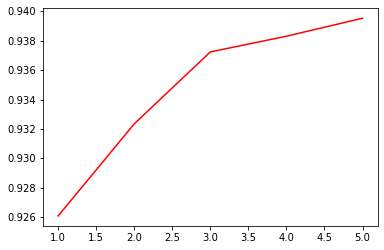

In [5]:
epoches = 5
sc_scorecard=[] # stochastic grdadient 점수카드
sc_score_array = []
epoches_array = []
start = time.time()
for epoch in range (epoches):    
    
    epoches_array.append(epoch+1)
    # train
    for record in training_data_list : 
        # split csv index by ',' 
        all_values = record.split(',')
        
        # input min-max scaling 0-255 => 0.01~1 
        inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01 #이미 line by line으로 읽어서 1차원 0.01< ipnut <=1
        
        # make target array
        targets = np.zeros(output_nodes)
        targets[int(all_values[0])] = 1
        
        n.train(inputs,targets)
    
    for record in test_data_list :
        # input and tarkget
        all_values=record.split(',')
        correct_label=int(all_values[0])
        inputs=(np.asfarray(all_values[1:])/255.0*0.99)
        outputs = n.query(inputs)
        label=np.argmax(outputs)

        if (label==correct_label) : 
            sc_scorecard.append(1)
        else:
            sc_scorecard.append(0)
            


    
    
    sc_scorecard_array=np.asarray(sc_scorecard)
    sc_score = sc_scorecard_array.sum()/sc_scorecard_array.size
    
    print("sc's performance=",sc_score)
    
    sc_score_array.append(sc_score)
    
    
    # estimate time 
    finish = time.time()
    print(f"{finish-start} seconds for 1 epoches")
    start = time.time()

# make a plot
plt.plot(epoches_array,sc_score_array,'r')

score_data = pd.DataFrame(data = {"SGD(score)" : sc_score_array},index=epoches_array)

# Mini Batch 

In [6]:
class NN:
    def __init__(self,inputnodes, hiddennodes,outputnodes,learningrate) :   #초기화 함수
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function = lambda x :scipy.special.expit(x)
        
        pass
    
    
    def train(self,inputs_list,targets_list):
        #WHO WIH를 업데이트함
        inputs =np.array(inputs_list,ndmin=2).T  #인풋배열만들기
        targets = np.array(targets_list,ndmin=2).T #결과배열만들기
        
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        
        final_errors = targets-final_outputs
        hidden_errors=np.matmul(np.transpose(self.who),final_errors)        
        
        deltaho =self.lr*np.matmul(final_errors*final_outputs*(1-final_outputs),np.transpose(hidden_outputs))
        deltaih =self.lr*np.matmul(hidden_errors*hidden_outputs*(1-hidden_outputs),np.transpose(inputs))

        return deltaho,deltaih
    
    def update(self,ho,ih):
    
        self.wih= self.wih+ih
        self.who= self.who+ho
        
        pass

   
    def query(self,inputs_list) :
        inpus = np.array(inputs_list,ndmin=2).T
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        
        return final_outputs

In [7]:
input_nodes = 784
hidden_nodes = 150
output_nodes = 10 #0~9 구분가능하게
learningrate = 0.5

# create Neural Net with HyperParams
n = NN(input_nodes,hidden_nodes,output_nodes,learningrate)

In [8]:
epoches = 5

mb_scorecard=[] # Mini batch
mb_score_array = []
epoches_array = []
batch_size = 100
start = time.time()


for epoch in range(epoches):    
    epoches_array.append(epoch+1)
    
    # for  # of train sample/batch_szie = 6000
    epoch_minibatch = int(len(training_data_list)/batch_size)
   
    # (6000,1)  6만개를 batch_size씩 묶어서 update, batch_size개가 될 때마다 업데이트 => 
    training_data_MBlist=[0 for x in range(epoch_minibatch)]
    
    
    # 60000/batch_size => 전체를 학습하기 위해서 6000번 반복
    for i in range(len(training_data_MBlist)):
        
        # weights를 저장할 mask 선언
        deltaih = np.zeros((hidden_nodes,input_nodes))
        deltaho = np.zeros((output_nodes,hidden_nodes))
        
        # i번째 훈련시 batch_size의 sample씩 배정
        training_data_MBlist[i]=training_data_list[batch_size*i:batch_size*(i+1)]
        
        # 10개의 sample씩
        for k,record in enumerate(training_data_MBlist[i],start=1):
            

            all_values = record.split(',') 
            inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01
            targets = np.zeros(output_nodes)
            targets[int(all_values[0])] = 1
            
            # 10번째 때
            if k==batch_size:
                # 훈련된 weight를 mask에 저장
                K = n.train(inputs,targets)
                deltaho = deltaho+K[0]
                deltaih = deltaih+K[1]
                
                # batch_size로 나눈 뒤 업데이트
                ho = deltaho/len(training_data_MBlist[i])
                ih = deltaih/len(training_data_MBlist[i])
                n.update(ho,ih)
                # initialize mask
                deltaih = np.zeros((hidden_nodes,input_nodes))
                deltaho = np.zeros((output_nodes,hidden_nodes))

            #  
            else :
                # 훈련 후 저장
                K=n.train(inputs,targets)
                deltaho = deltaho+K[0]
                deltaih = deltaih+K[1]
                
    for record in test_data_list :
        all_values=record.split(',')
        correct_label=int(all_values[0])

        inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
        outputs = n.query(inputs)
        label=np.argmax(outputs)

        if (label==correct_label) : 
            mb_scorecard.append(1)
        else:
            mb_scorecard.append(0)

    scorecardMB_array=np.asarray(mb_scorecard)
    scoreMB = scorecardMB_array.sum()/scorecardMB_array.size
    
    print("MB's performance=",scoreMB)
    mb_score_array.append(scoreMB)

    # estimate time 
    finish = time.time()
    print(f"{finish-start} seconds for 1 epoches")
    start = time.time()
    
print(epoches_array)
print(mb_score_array)


MB's performance= 0.8903
34.33669471740723 seconds for 1 epoches
MB's performance= 0.902
36.881747007369995 seconds for 1 epoches
MB's performance= 0.9097333333333333
38.14884400367737 seconds for 1 epoches
MB's performance= 0.915325
39.65579700469971 seconds for 1 epoches
MB's performance= 0.91978
37.374868869781494 seconds for 1 epoches
[1, 2, 3, 4, 5]
[0.8903, 0.902, 0.9097333333333333, 0.915325, 0.91978]


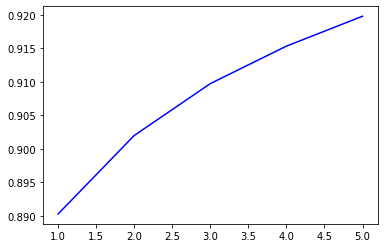

In [9]:
# make a plot
plt.plot(epoches_array,mb_score_array,'b')
plt.show()